# Lab10 - Classification
#### Name - Matt McLaughlin
#### Class - CSCI349 
#### Instructor - Brian King

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
####################################
#Additional import statements
import plotly.figure_factory as ff

1) [P] Read about the famous Fisher's Iris dataset. This is perhaps the most commonly used dataset to teach students how to build classification models: https://en.wikipedia.org/wiki/Iris_flower_data_set
<br/>Then, include the following code to import a copy of the Iris data from Seaborn's library of datasets:
df_iris = sns.load_dataset('iris')
<br/>Print out the results of info() to understand the types of each variable as read in from the csv file.

In [4]:
df_iris = sns.load_dataset('iris')

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


2) [P] Be thankful for a moment, because the data are clean. However, the species variable needs work.
Convert the variable to a pandas Categorical variable. Then show the distribution of your variable (how
many of each species?). Repeat the info() output to show that your variable is now categorical, and not
merely an object.

In [12]:
cat_list = df_iris.species.unique()
df_iris.species = pd.Categorical(values=df_iris.species, categories=cat_list)

In [13]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


3) [P] Now, perform essential summarizing tasks on your data. Show the output of describe() and show the
first 10 observations.

In [14]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### More visual EDA and plotting
<br/>It's far more telling to generate good visualizations of your data. You will generate numerous plots of your data.
Use the interface of your choosing. Any of matplotlib, seaborn, plotly, or a combination of all, are acceptable.
(HINT - Sometimes for quick visualizations, the pandas interface to matplotlib is simple and effective! For example,
df_iris.boxplot()! )
<br/>Do we need to normalize these data for visualizations? All four variables are measurements on the same
scale. It's actually more telling to ensure they are on the original scale and not normalized in any way.
Remember – a data scientist has a wealth of tools and tricks to accomplish a large number of tasks to get
from raw data to models, predictions, and visualizations. Don't ever start blindly applying random steps!
That will always lead you to dangerous territory in data science, possibly causing you to draw conclusions
that will only get you in trouble.
<br/>For these plots, minimally, be sure to title and label your plots!

4) [P] Always start with basic univariate plots. Create a single boxplot showing the distribution of each of the four
independent variables on one plot, using a boxplot. Ignore the target variable species for the time. For
example:
<br/>This is what it should look like with plotly:
<br/>With all plots requested, you may use your own color schemes and be creative.

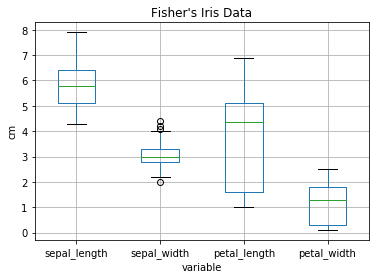

In [19]:
df_iris.boxplot()
plt.title("Fisher's Iris Data")
plt.xlabel("variable")
plt.ylabel("cm")
plt.show()

#### Melting your data into a long format
Seaborn is great for dealing with lots of variables. And even better, it usually knows how to interpret those
variables... usually. But, its interface is limited for interactive data visualization. If you're using plotly, you can make
the above graph using the lower level graph_objects interface, and use the add_trace method of the
Figure object to add subsequent box plots for each variable. However, this approach, while powerful, requires
several lines of code. Sometimes you want the quickness and ease of plotly.express to create many very
simple graphs. To do this, you need to transform your data into melted frame using pd.melt(). This cool
function quickly transforms your data frame from being "wide" into "long", making it very easy to still use
plotly.express. In fact, Plotly Express explicitly suggests that you transform your data into what they call Tidy
Data using the pd.melt() function (See https://plot.ly/python/px-arguments/ ) Or, you can just use the melt
method of your DataFrame object. Both will accomplish the same thing. It's worth taking a moment read about
this valuable pandas function. It can potentially help you on a wide number of visualizations.
<br/>For example:
<br/>df_iris_melt = pd.melt(df_iris, id_vars="species")
<br/>fig = px.box(df_iris_melt, x='variable',y='value',title="Fisher's Iris")
<br/>fig.show()
<br/>The above code is how I generated the plotly boxplot above.

5) [M/P] Violin plots are becoming increasingly common in data science. First, explain what a violin plot is. Then,
figure out how to generate a univariate violin plot of each independent variable. Compare and contrast your
violin plot against the boxplot. (NOTE: Seaborn makes this very easy!)
<br/>For example, this is what it looks like with Plotly:

**A violin plot is like a box plot in that it shows mean, IQR, etc. but also the full distribution of the data. The violinplot below resembles the above box plots, but gives far more information on distribution. For example we can see that sepal_width is unimodal and enormously concentrated around the center value, and petal_width is dimodal with a smaller distribution between Q2 and Q1.**

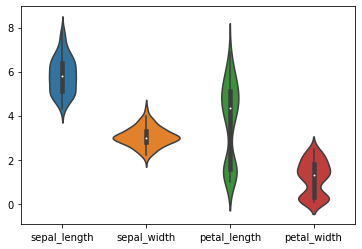

In [42]:
sns.violinplot(data=df_iris)

**6)** [P] Show a histogram and/or a density plot of each variable on a single plot. And be sure to provide some way
to see the distribution of all four variables separately. You could use alpha blending on the histogram, or
perhaps consider a "rugplot" overlaid on top.
<br/>For example, this is what it looks like with Plotly
<br/>(NOTE: pandas can plot a density plot directly much better!)

https://plot.ly/python/distplot/
Found a lot of good stuff there, but my plots aren't showing up.

In [46]:
fig = px.histogram(df_iris_melt, marginal="rug")
fig.show()

In [47]:
fig = px.histogram(df_iris, marginal="rug")
fig.show()

In [48]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [49]:
fig = ff.create_distplot(df_iris, df_iris.columns, show_curve=False)
fig.show()

KeyError: 0

In [35]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug",
                   hover_data=df.columns)
fig.show()

7) [M] Summarize your findings from these plots. Is one most ideal for understanding your distribution?
Characterize the distribution of your four variables. Remember, this is a univariate exploration, so you don't
care about the class variable yet.

**Stuff and things**

Now, you will perform some basic multivariate analyses. If you're NOT using plotly, be sure to explore how to make
plots large enough to examine using the figsize parameter. A reasonable size should be (10,8).

8) [P] Use the pandas interface to generate a quick boxplot (df_iris.boxplot()!) However, look up how to
created a faceted boxplot with each variable listed in a separate plot, automatically showing the distributions
of your variables by "species".
<br/>For example:

9) [P] Use either seaborn or plotly to generate a boxplot over each variable, but now showing the three different
species as distinct boxplots. For example:

10) [P] Generate a violin plot over all variables much like the previous boxplot, but again, be sure to indicate the
species as a distinct color.

11) [P] Read about the scatter_matrix() function in pandas. Use it to generate a scatterplot matrix, and
use species for the color.

12) [P] Read about the seaborn pairplot() function, then use it to generate one of the most useful
scatterplots matrices you'll see with this data. It won't be too different than the scatter_matrix function,
just easier to create. Take a moment to study the plot, and really try to understand just how much information
this plot is conveying. Be sure to figure out how to distinguish the species by color.

13) [M] From your observations, which species do you expect to have the best classifier performance? Why?

OK. Let's get started with our first adventure into machine learning using scikit-learn. So far, you've learned a few
different methods for modeling data. The majority of this lab will be designed to get you going with creating
models, but there will be more emphasis on evaluation (performance on your training data) and validation
(performance on your test data) of your models. Follow along, take notes in your markdown file, and make the most of this lab. There is a lot here, and it represents the typical workflow of those who actually work with these
types of data modeling problems using machine learning in practice. The next lab will give you more opportunities
to explore sklearn with more challenging data. However, you need to learn the API with the basics first.
<br/>We will start simple, but will progressively, and quickly, release you to use Google and other sites to guide
your own learning to find the answers.

Before you begin, read through the scikit tutorial on supervised learning: https://scikit-
learn.org/stable/tutorial/statistical_inference/supervised_learning.html . You do not need to implement the exercises in the tutorial (though it would not be a bad idea if this is all very new to you! If you do, do it in your own
notebook file.) Read it to get an understanding of how to work with scikit-learn. Some of these exercises here are
taken directly from this tutorial. However, do NOT use the iris data built into scikit-learn! Just keep working with
the data you have already loaded in above.

#### Preparing our data for modeling
When you are done with preprocessing, you will have a data frame that contains all of your data ready to model.
Even before you split your data into training and test data, most modeling methods will require you to tease apart
the independent (predictor) variables and the dependent (target) variable(s). The convention generally followed is
to use the name X to represent the data for your independent variables, and the target variable is represented by
y. Both should be data frames, though if y is a single variable (most common), then it's OK to represent it as a
pd.Series or np.array object.

14) [P] Split your data frame into X and y, where X represents only your four predictor variables, and y represents
only the target class, species. Output the names of the columns and the shape of both just to confirm that
they both have the same number of observations, and that the number of variables in each are correct. You
should have (150, 4), and (150, 1) respectively.

#### Building our classifier
We're going to dive right in and build a classifier using default hyperparameters, using ALL of our data for training
data. Since we started with the decision tree model, let's begin there. The model we want to begin with is a DecisionTreeClassifier. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<br/>Generally, the sklearn documentation uses a standard convention naming all classifier objects as clf. All
classifiers have a common interface, which is awesome. You use fit() to train a model with training data, and
predict() to generate predictions on any data it is given. A common interface like this makes is incredibly easy
to try out different models on your data.
#### NOTE: You will need to be sure you import the proper libraries from sklearn! You will not be told which packages to import here.
<br/>NOTE: Whenever I work with a new classifier, I always try to ensure the classifier can be trained with ALL
of my data, and then predict back that same data. Don't bother jumping into cross-validation until you
know the classifier can at least predict back what you trained it with! If it can't even do that, then
something has gone horribly wrong.
<br/>Let's build a classifier with all of the data and evaluate its performance. For the time, let's ignore normalizing the
attributes, and leave our data as is. As we discussed in the beginning, all four variables are mostly falling within a
similar range, representing the same unit, and thus, at least for these data, normalizing is not as critical yet,
particularly since we are going to start working with decision trees.

15) [P] Create an instance of a decision tree classifier using DecisionTreeCassifier() with default
parameters. Name the classifier clf. Train the classifier with the entire dataset (i.e. all of X and y.) Show the
classifier after training by simply include print(clf)so you can see the default parameters used to build
the classifier

16) [P] Remember that one of the most popular reasons for using decision trees is because the model is easily
visualized. Use the plot_tree method to plot the tree. Explore the arguments to be sure that nodes are
shaded by target class. Variable names should be shown. Your tree should look something like the following:

17) [P] - Use this model to predict back your training data to evaluate your model. Name your predictions
y_pred. Report the accuracy using the score method on the classifier.

18) [M] You should see 100% accuracy. Why?

19) [P] Let's simplify our tree structure. Create a new tree, but adjust the pruning / complexity parameters. How?
We'll keep this simple. Ensure that every leaf in the tree contains at least 5 samples. Show the tree that you
induced, and again store your predictions as y_pred. Then, show the accuracy. (It should be 97.3%)

20) [M/P] OK – clearly we have lower accuracy. Dive deeper. Accuracy is usually not a good measure of classifier
performance. Look up the function classification_report. This outputs a lot of performance
information! What do the micro, macro, and weighted average readings mean? Generate a full report. Which
class had the lowest precision? Which had the lowest recall?

21) [P] Output a confusion matrix using the confusion_matrix method in sklearn.metrics. Your result
should look like a square matrix, where rows are the true labels, and the columns are the predicted labels, and
the diagonal represents the cases where the true label and predicted label match.

22) [P] Even better! Use the plot_confusion_matrix to output an excellent visual summary of the classifier
performance. Your result should look as follows:

23) [M] Interpret your confusion matrix and classification report. Which class is performing the best? Which is
performing the worst? How many total incorrect predictions?

#### Training vs. Test Data

24) You need to create a train / test split of your data to properly validate your model. Read about
sklearn.model_selection function called train_test_split. Then, use it to split your data into
an 70% / 30% split of training and testing data, respectively. You should end up with four data frames,
denoted X_train, X_test, Y_train, Y_test. Use an initial random seed of 0. Be sure to shuffle
the data (verify that this is a default setting.) Show the dimensions of each of these (i.e. how many entries in
each?)

NOTE: Technically, train_test_split, like most scikit-learn modules, ignore pandas, and return numpy
arrays. If you properly set up your data, and maintain your types throughout, it will do a reasonable job
maintaining those types. I generally find it's important to keep my data, and splits, my predicted, etc. all as pandas
DataFrames. If you are missing your column and index variables, it's most likely because you lost type information
at some point in your pipeline. Just cast your data back to a pandas DataFrame and restore those important
variables.

25) Create a new instance of DecisionTreeClassifier with an initial random seed value of 100, and a
minimum number of samples in a leaf set to 5. Store the classifier as clf. Show the classifier after training by
using print(clf)

26) Use this model to predict the labels on your training and test data. Call your predictions y_pred_train. and
y_pred_test. Show the accuracy of your classifier on both your training data and test data.

27) [P/M] Use the techniques above to assess the performance of your classifier on both the training and the test
data. Summarize your findings.

28) [P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to
determine which observations are being misclassified. Use data selection techniques to output the data in
df_iris that are being misclassified in the test data only.

29) [P] It's even more interesting when you can visualize where in your feature space your classifier might be
missing something. Create a scatterplot matrix, but this time, figure out how to highlight the instance(s) that
are being misclassified. Can you create a new variable that represents the accuracy of the prediction? Use it as
another dimension? A new color? A larger point size? Any scatter plot you can come up with that will highlight
the location of the misclassified data receives full credit. This is an important step in understanding how to
deal with problematic data.
<br/>For example, this is one square of a scatter matrix that highlighted the observations that were mis-classified.
This is a nice visual indicator that, as expected, they were instances falling on the divide between versicolor
and virginicia

So, that was awesome, right? ("Yes, I know!" you say.) But, you aren't following the standard industry practice of
performing true k-fold cross validation.
Cross validation

30) [M/P] Read about the KFold class. State what a KFold cross validation object will do for you. Then, create
an instance of KFold with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your instance
kfold.

31) [P] Read about the split() method for KFold. It will help you iterate through each fold of your data. Take
the time to understand how it works! If you set this up right, you will have a loop that will let you easily select
train and test data for each fold. Once you do that, then you are merely repeated what you did already for the
70/30 split data above! For each fold, you fit a new model on the training data for that fold, then validate the
model on the test data for the same fold. After 10 folds, you will have validated your model using your entire
dataset as validation data!
<br/>Inside your loop, you should NOT print out your classification results yte. (However, sometimes it's useful to
use Python timing functions to collect timing on different model building tasks, and that would be done inside
the loop, placing a time stamp before and after the call to fit().) Only store the results of predicting on the
test fold. I would accumulate my true class label and my predictions in a separate data frame, called
df_results.
<br/>If you do this right, you will have a new data frame with a variable, such as "dt_def", or "dt_default", representing the prediction from the default decision tree classifier.

32) [P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix.
NOTE: You won't be able to use the plot_confusion_matrix method here, but you should be able to
use the confusion_matrix method and seaborn's heatmap method. For example (using a poor color map!):

33) [P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross
validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified.

34) [P] As you would expect, the sklearn framework has some powerful methods that can run an entire cross
validation and report whatever metrics you want. Read about the cross_validate method, then use it to
run a 10-fold cross validation on a default decision tree, reporting back 'accuracy' and 'f1_macro'
measurements on both the training and testing data. Report your results as a single data frame. Your results
should look as follows.

35) [M] On the above, what are the variables fit_time and score_time?

36) [P] Read about the function cross_val_predict. This is perhaps among the most powerful of the model
selection functions provided by sklearn, as it will generate predictions. You can then use these predictions to
run a classification_report and report confusion matrices. Use the cross_val_predict
function to run a 10-fold cross validation with a default decision tree, and print the
classification_report on your results.

37) For your last task, you will perform model comparison tasks. Use the cross_val_predict method to
compare the predictive performance on the following models:
<br/>a. A default decision tree
<br/>b. A decision tree with "entropy" for measuring impurity
<br/>c. A KNeighborsClassifier with a two different values of k (.)
<br/>d. MultinomialNB classifier (sklearn's Naïve Bayes implementation)
Compare and contrast the performance results between the different models. Which one would you choose?